In [33]:
import pyaudio
import numpy as np

# 音声を出力するためのストリームを開く --- (*1)
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=44100,
                frames_per_buffer=1024,
                output=True)

# 適当なサイン波を生成する --- (*2)
samples = np.sin(np.arange(50000) / 20)

# サイン波を再生する --- (*3)
print("play")
stream.write(samples.astype(np.float32).tostring())
stream.close()

play


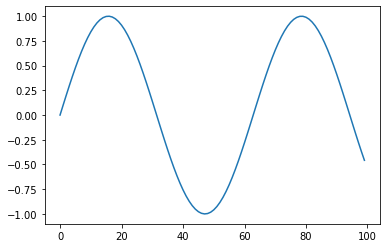

In [37]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

samples=np.sin(np.arange(8000)/10)
plt.plot(samples[0:100])
plt.show()

In [ ]:
RATE = 44100
C= 261.626
BPM = 100
L1 = (60 / BPM * 4)
L8=L1/8

tone(C, L8, 1.0)

def tone(freq, length, gain):
    slen = int(length * RATE)
    t = float(freq) * np.pi * 2 / RATE
    return np.sin(np.arange(slen) * t) * gain

In [38]:
import pyaudio
import numpy as np

# サンプリングレートを定義 --- (*1)
RATE = 44100

# BPMや音長を定義 --- (*2)
BPM = 100
L1 = (60 / BPM * 4)
L2,L4,L8 = (L1/2,L1/4,L1/8)

# ドレミ...の周波数を定義 --- (*3)
C,D,E,F,G,A,B,C2 = (
        261.626, 293.665, 329.628, 
        349.228, 391.995, 440.000,
        493.883, 523.251)

# サイン波を生成 --- (*4)
def tone(freq, length, gain):
    slen = int(length * RATE)
    t = float(freq) * np.pi * 2 / RATE
    return np.sin(np.arange(slen) * t) * gain

# 再生 --- (*5)
def play_wave(stream, samples):
    stream.write(samples.astype(np.float32).tostring())


# 出力用のストリームを開く --- (*6)
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=RATE,
                frames_per_buffer=1024,
                output=True)

# ドレミを再生 --- (*7)
print("play")
play_wave(stream, tone(C, L8, 1.0)) 
play_wave(stream, tone(D, L8, 1.0)) 
play_wave(stream, tone(E, L4, 1.0)) 
stream.close()

play
